# 워드클라우드(말구름) 그리기
이번에는 자신의 관심 주제에 대한 기사 텍스트 데이터를 **빅카인즈**에서 다운받아<br>
실제 가장 많이 등장하는 단어 비중에 따른 워드클라우드를 그려보겠습니다<br>
<br>
우선 [빅카인즈](https://www.bigkinds.or.kr/)에서 회원 가입<br>
이후 검색창에 관심 단어를 넣고 최근 3개월의 검색 결과를 봅니다<br>
그리고 다운로드하여 현 작업 폴더로 파일을 옮겨 놓습니다

다음은 이번 작업에 필요한 라이브러리들입니다

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib as mpl
import matplotlib.pyplot as plt

글자와 색 지정

In [2]:
# Font setting
font_path = 'C:\\Windows\\Fonts\\H2GTRE.TTF'

# Colormap
cmap_B = plt.cm.GnBu(np.linspace(0,1,20))
cmap_B = mpl.colors.ListedColormap(cmap_B[3:,:-1])

cmap_R = mpl.pyplot.cm.YlOrRd(np.linspace(0,1,20))
cmap_R = mpl.colors.ListedColormap(cmap_R[5:,:-1])

데이터 읽기

In [6]:
File='NewsResult_20200229-20200530.xlsx' #실제 파일 이름에 맞게

df = pd.read_excel(File) #파일 읽기

In [15]:
df.shape

(1916, 19)

In [17]:
texts = df.values.T.tolist()[14] #15번째 열이 키워드

## 데이터 전처리
빅카인즈 데이터의 장점 가운데 하나는 토큰화 과정을 마친 명사 데이터(키워드)를 제공한다는 점입니다<br>
그러나 자연어처리에선 이 외에도 여러 전처리 과정이 필요합니다

### 데이터의 확인

In [16]:
type(terms[0]) #각 데이터가 하나의 긴 str 데이터임

str

In [35]:
terms = [x.split(',') for x in texts] #각각 나눠줌

모두 하나의 Pool로 합침

In [44]:
terms1 = list()
for each_terms in terms:
    terms1.extend(each_terms)

In [45]:
len(terms1)

457937

### 한 글자 단어와 영단어는 제외

In [46]:
import re
ref_terms = [x for x in terms1 if (len(str(x))>1) and not re.match(r'[A-Za-z]+',str(x))]

### 제거하고 싶은 단어: 불용어 stopwords

In [48]:
# remove stopwords v1.0
stopwords = ['들이', '하면', '해서','생각','하지','하기','경우','그거','하게','정도',
             '시간','어디','올해','이거','하나','어디','진짜','때문','해도','사실',
             '이유','하루','작년','진짜','자신','이번','이상','한거','전화','시작',
             '자체','우리','단어','설명']
ref_terms1 = [str(x) for x in ref_terms if x not in stopwords]

빈도 테이블로 바꿔주기

In [50]:
ref_terms1[1]

'강남'

In [51]:
import collections

freq1 = collections.Counter(ref_terms1)

In [52]:
freq1

Counter({'하락세': 505,
         '강남': 2964,
         '반등': 53,
         '강북': 395,
         '서울': 6430,
         '아파트': 4308,
         '줄다리기': 11,
         '팽팽': 2,
         '주간': 163,
         '매매': 712,
         '송파': 2676,
         '0.02': 3,
         '광진': 197,
         '노원': 278,
         '상승': 1686,
         '중저가': 27,
         '위주': 511,
         '수도권': 651,
         '인천': 997,
         '안산': 155,
         '오름세': 118,
         '코로나19': 2321,
         '각종': 200,
         '규제책': 31,
         '조정': 263,
         '시장': 1359,
         '부동산': 1763,
         '진정': 22,
         '추가': 542,
         '하락': 1445,
         '강남3구': 283,
         '급매': 102,
         '소진': 46,
         '보유세': 491,
         '부담': 536,
         '잠재적': 7,
         '악재': 42,
         '작용': 89,
         '소폭': 134,
         '공급': 605,
         '부족': 228,
         '이슈': 138,
         '모습': 362,
         '경기권': 7,
         '강화': 464,
         '분양': 788,
         '전매': 79,
         '제한': 152,
         '경기': 1771,
        

빈도가 높은 순으로 정렬하기

In [53]:
sorted_freq1 = sorted(freq1.items(), key=lambda item: item[1], reverse=True)
dict_freq1 = {x[0]:x[1] for x in sorted_freq1}

### 말구름 그리기

In [54]:
dict_freq1

{'서울': 6430,
 '후보': 4405,
 '아파트': 4308,
 '지역': 3678,
 '강남': 2964,
 '송파': 2676,
 '코로나19': 2321,
 '민주당': 2016,
 '가격': 1853,
 '의원': 1853,
 '주택': 1798,
 '경기': 1771,
 '부동산': 1763,
 '통합': 1741,
 '정부': 1703,
 '상승': 1686,
 '대표': 1618,
 '총선': 1571,
 '송파구': 1492,
 '하락': 1445,
 '선거': 1426,
 '시장': 1359,
 '거래': 1179,
 '단지': 1176,
 '확진자': 1057,
 '지원': 1040,
 '상황': 1035,
 '위원장': 1029,
 '기준': 1007,
 '결과': 1007,
 '인천': 997,
 '조사': 994,
 '서초': 979,
 '통합당': 973,
 '예정': 939,
 '서울시': 911,
 '규제': 908,
 '사업': 884,
 '집값': 856,
 '수도': 854,
 '도시': 809,
 '영향': 792,
 '가구': 789,
 '분양': 788,
 '진행': 786,
 '가능': 785,
 '대비': 776,
 '지역구': 762,
 '계획': 754,
 '서비스': 751,
 '더불어민주당': 714,
 '매매': 712,
 '기록': 692,
 '정책': 691,
 '전망': 687,
 '당선': 687,
 '미래': 683,
 '대책': 678,
 '지구': 674,
 '공천': 671,
 '국민': 664,
 '운영': 662,
 '전세': 655,
 '수도권': 651,
 '이날': 648,
 '중심': 642,
 '국회': 636,
 '이용': 632,
 '전국': 625,
 '센터': 624,
 '당선인': 617,
 '검사': 611,
 '사람': 608,
 '공급': 605,
 '앵커': 604,
 '평균': 602,
 '수요': 583,
 '종부세': 572,
 '전용': 568,
 '

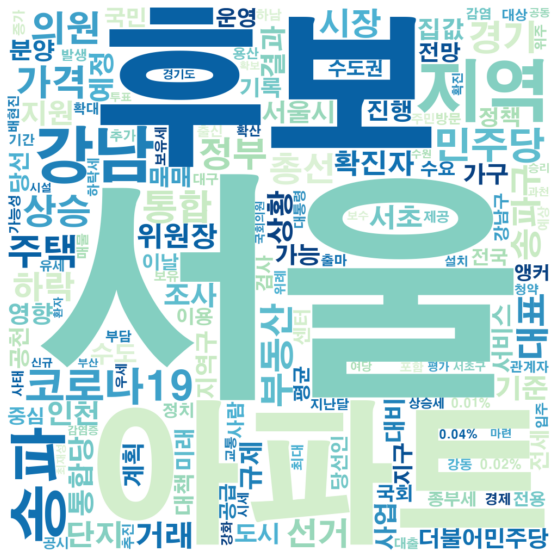

In [55]:
# drawing wordcloud
wordcloud = WordCloud(font_path=font_path,
                      max_words=150,
                      colormap=cmap_B, # color
                      stopwords=stopwords,
                      background_color='white',
                     width=1000, height=1000).generate_from_frequencies(dict_freq1)

mpl.pyplot.figure(figsize=(10,10))
mpl.pyplot.imshow(wordcloud, interpolation="bilinear")
mpl.pyplot.axis("off")
mpl.pyplot.show()